# Preps

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns 

In [36]:
from sklearn.metrics import confusion_matrix
import scipy.io as sio
from google.colab import files, drive
%matplotlib inline

# Task 1

In [40]:
# loading and separating the dataset
mnist = keras.datasets.mnist
(train_images,train_labels) , (test_images,test_labels) = mnist.load_data()

train_images = tf.expand_dims(train_images, axis = 1)
test_images = tf.expand_dims(test_images, axis = 1)

train_labels = keras.utils.to_categorical(train_labels)
vtest_labels = keras.utils.to_categorical(test_labels)

v_data = (test_images,vtest_labels)

In [41]:
# Norming the data to 1
test_images, train_images = test_images/255 ,train_images/255

In [42]:
# Creating the first model
model = keras.Sequential([

    tf.keras.layers.Conv2D(16,kernel_size=3,padding = "valid", activation = 'relu',input_shape=(1,28,28),data_format='channels_first', name ='Conv1'),

tf.keras.layers.Conv2D(16,kernel_size=3,padding = "valid", activation = 'relu',name = 'Conv2'),

tf.keras.layers.MaxPooling2D(pool_size = (2,2),name = 'Maxpool1',data_format='channels_first'),

tf.keras.layers.Conv2D(32,kernel_size=3,padding = "valid", activation = 'relu',name = 'Conv3'),

tf.keras.layers.Conv2D(32,kernel_size=3,padding='valid',activation='relu'),

tf.keras.layers.MaxPooling2D(pool_size =(2,2),name = 'Maxpool2',data_format = 'channels_first'),

tf.keras.layers.Flatten(name = 'Flatten1'),

tf.keras.layers.Dense(10,activation = 'softmax')

])

In [43]:
# Compileing by the given optimizer and loss
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam',metrics='accuracy')

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 16, 26, 26)        160       
_________________________________________________________________
Conv2 (Conv2D)               (None, 14, 24, 16)        3760      
_________________________________________________________________
Maxpool1 (MaxPooling2D)      (None, 14, 12, 8)         0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 12, 10, 32)        2336      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 8, 32)         9248      
_________________________________________________________________
Maxpool2 (MaxPooling2D)      (None, 10, 4, 16)         0         
_________________________________________________________________
Flatten1 (Flatten)           (None, 640)              

In [45]:
# Fitting the model
history = model.fit(train_images,train_labels,batch_size = 32,epochs = 5,validation_data =v_data )

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2346 - accuracy: 0.9259 - val_loss: 12.9497 - val_accuracy: 0.9718
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0772 - accuracy: 0.9758 - val_loss: 7.9451 - val_accuracy: 0.9802
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 8.8450 - val_accuracy: 0.9813
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 8.0003 - val_accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0360 - accuracy: 0.9883 - val_loss: 6.6378 - val_accuracy: 0.9870


In [29]:
def plot_everything(history):
  # Plotting the accuracy and the loss of the model
  plt.figure(figsize=(12,6))
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy', fontsize = 20)
  plt.ylabel('accuracy', fontsize = 20)
  plt.xlabel('epoch', fontsize = 20)
  plt.legend(['train', 'validation'], loc='upper left')
  plt.subplot(122)

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss', fontsize = 20)
  plt.ylabel('loss', fontsize = 20)
  plt.xlabel('epoch', fontsize = 20)
  plt.legend(['train', 'validation'], loc='upper left')
  plt.tight_layout()


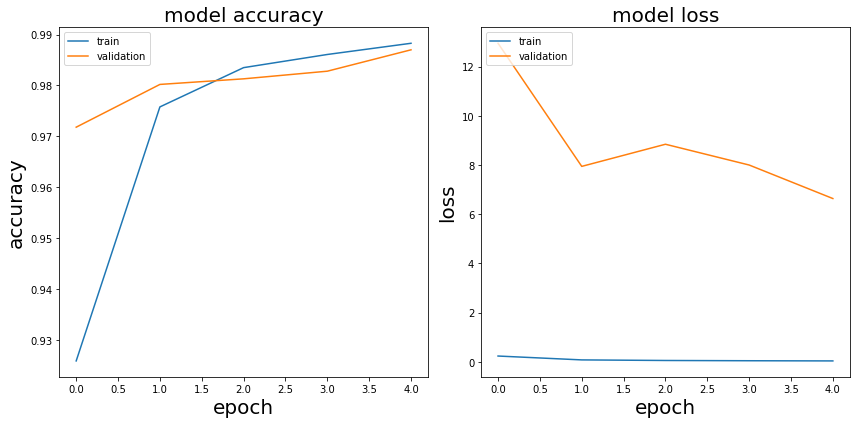

In [46]:
plot_everything(history)

In [47]:
# Calculating the loss and the accuracy
model.evaluate(test_images,vtest_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0409 - accuracy: 0.9874


[0.04088088497519493, 0.9873999953269958]

In [48]:
predictions = model.predict(test_images)
predictions = np.array([np.argmax(e) for e in predictions])

In [51]:
def pcm(tl,preds):
  # Confusion Matrix plotter function
  plt.figure(figsize=(8,8))
  ax1 = sns.heatmap(confusion_matrix(tl,preds), fmt = ".0f",annot=True)
  ax1.set_xlabel('True labels', size = 20)
  ax1.set_ylabel('Predicted labels', size = 20)
  ax1.set_title('Confusion Matrix', size = 20)
  None

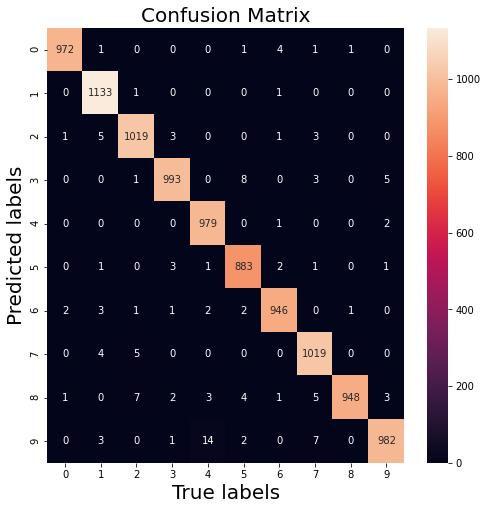

In [50]:
pcm(test_labels,predictions)

#Task 2

In [68]:
#drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [69]:
"""
!cd "/content/drive/My Drive/"
!cp  "/content/drive/MyDrive/Colab Notebooks/test_32x32.mat" "test_32x32.mat"
!cp  "/content/drive/MyDrive/Colab Notebooks/train_32x32.mat" "train_32x32.mat"
"""

In [52]:
# Loading the data
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')

In [53]:
# Creating the train and test set
x_train = train_data['X']
x_test = test_data['X']

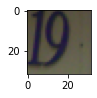

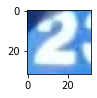

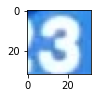

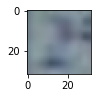

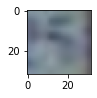

In [54]:
for i in range(1,6):
# Showing the images
  plt.subplot(3,2,i)
  plt.imshow(x_train[:,:,:,i])
  plt.show()

In [55]:
# Reshapeing and divideing
x_train = np.array([x_train[:,:,:,i]/255 for i in range(np.array(x_train).shape[-1])])
x_test = np.array([x_test[:,:,:,i]/255 for i in range(np.array(x_test).shape[-1])])

In [83]:
# Creating the train and test labels
y_train = train_data['y']
y_test = test_data['y']

In [12]:
def change(x):
  if x == 10:
    x = 0
  return x
vfunc = np.vectorize(change)

In [85]:
# Changeing the 10 into 0, because the source said, the 0's are in the 10th label
y_test = vfunc(y_test)
y_train = vfunc(y_train)

In [58]:
# One-hot encoding
y_train = keras.utils.to_categorical(y_train,num_classes=10)
vy_test = keras.utils.to_categorical(y_test,num_classes=10)

In [69]:
print('The number of classes are: ' + str(np.unique(len(y_test))))
print('The number of train examples are:' + str(len(x_train)))
print('The number of test examples are:' + str(len(x_test)))
print('The dimension of the images: ' +str(x_test.shape[-1]) + " ,which means they are RGB coded")

The number of classes are: [26032]
The number of train examples are:73257
The number of test examples are:26032
The dimension of the images: 3 ,which means they are RGB coded


In [73]:
# Validation data
v_data2 = (x_test,vy_test)

In [72]:
model_2 = keras.Sequential([
# Creating the second model

    tf.keras.layers.Conv2D(16,kernel_size=3,padding = "valid", activation = 'relu',input_shape=(32,32,3), name ='Conv1'),

tf.keras.layers.Conv2D(16,kernel_size=3,padding = "valid", activation = 'relu',name = 'Conv2'),

tf.keras.layers.MaxPooling2D(pool_size = (2,2),name = 'Maxpool1'),

tf.keras.layers.Conv2D(32,kernel_size=3,padding = "valid", activation = 'relu',name = 'Conv3'),

tf.keras.layers.Conv2D(32,kernel_size=3,padding='valid',activation='relu'),

tf.keras.layers.MaxPooling2D(pool_size =(2,2),name = 'Maxpool2'),

tf.keras.layers.Flatten(name = 'Flatten1'),

tf.keras.layers.Dense(10,activation = 'softmax')

])

In [75]:
# Compeleing
model_2.compile(loss = 'categorical_crossentropy', optimizer = 'Adam',metrics='accuracy')

In [76]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 30, 30, 16)        448       
_________________________________________________________________
Conv2 (Conv2D)               (None, 28, 28, 16)        2320      
_________________________________________________________________
Maxpool1 (MaxPooling2D)      (None, 14, 14, 16)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
Maxpool2 (MaxPooling2D)      (None, 5, 5, 32)          0         
_________________________________________________________________
Flatten1 (Flatten)           (None, 800)              

In [77]:
# Training the second model
history_2 = model_2.fit(x_train,y_train,batch_size = 32,epochs = 15,validation_data=v_data2)

Epoch 1/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.9299 - accuracy: 0.7060 - val_loss: 0.5964 - val_accuracy: 0.8297
Epoch 2/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.4906 - accuracy: 0.8570 - val_loss: 0.5075 - val_accuracy: 0.8533
Epoch 3/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.4333 - accuracy: 0.8735 - val_loss: 0.4901 - val_accuracy: 0.8589
Epoch 4/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.3924 - accuracy: 0.8840 - val_loss: 0.4454 - val_accuracy: 0.8717
Epoch 5/15
2290/2290 [==============================] - 10s 5ms/step - loss: 0.3666 - accuracy: 0.8930 - val_loss: 0.4150 - val_accuracy: 0.8816
Epoch 6/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.3443 - accuracy: 0.8984 - val_loss: 0.4041 - val_accuracy: 0.8821
Epoch 7/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.3267 - accuracy: 0.9041 - val_loss: 0.3952 - val_ac

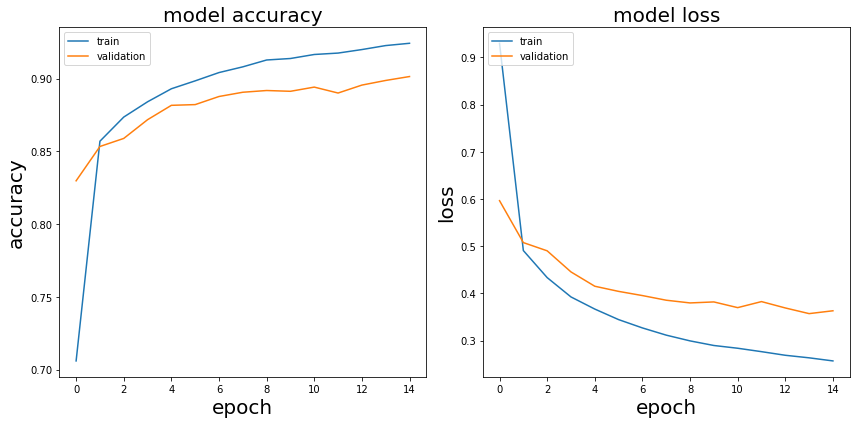

In [78]:
plot_everything(history_2)

In [79]:
model_2.evaluate(x_test,vy_test)

814/814 [==============================] - 2s 3ms/step - loss: 0.3630 - accuracy: 0.9014


[0.3630122244358063, 0.9013906121253967]

In [80]:
# Making predictions for the confusion matrix
predictions_2 = model_2.predict(x_test)
predictions_2 = np.array([np.argmax(e) for e in predictions_2])

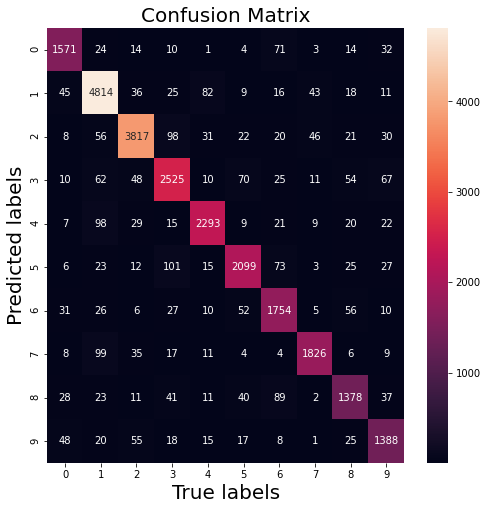

In [86]:
pcm(y_test,predictions_2)

The model makes most mistakes, when it predicted 7 instead of 1. It makes sense, cause these number written form is really similar. There are also some mistakes, when it predicts 8 instead of 6.

# Task 5

In [21]:
model_3 = keras.Sequential([

    tf.keras.layers.Conv2D(16,kernel_size=3,padding = "valid", activation = 'relu',input_shape=(32,32,3), name ='Conv1'),

tf.keras.layers.Conv2D(16,kernel_size=3,padding = "valid", activation = 'relu',name = 'Conv2'),

tf.keras.layers.MaxPooling2D(pool_size = (2,2),name = 'Maxpool1'),

tf.keras.layers.Conv2D(32,kernel_size=3,padding = "valid", activation = 'relu',name = 'Conv3'),

#####
#Added layers
# I only wanted to add a dropout, but to be sure I added a convolutional one and a maxpool 2
tf.keras.layers.Conv2D(64,kernel_size=3,padding = "valid", activation = 'relu',name = 'Conv4'),

tf.keras.layers.MaxPooling2D(pool_size =(2,2),name = 'Maxpool2'),

tf.keras.layers.Dropout(.4, name ="Dropper"),

########
tf.keras.layers.Conv2D(32,kernel_size=3,padding='valid',activation='relu', name = 'Conv5'),

tf.keras.layers.MaxPooling2D(pool_size =(2,2),name = 'Maxpool3'),

tf.keras.layers.Flatten(name = 'Flatten1'),

tf.keras.layers.Dense(10,activation = 'softmax')

])

In [22]:
model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam',metrics='accuracy')

In [23]:
history_3 = model_3.fit(x_train,y_train,batch_size = 32,epochs = 15,validation_data=v_data2)

Epoch 1/15
2290/2290 [==============================] - 11s 5ms/step - loss: 1.0810 - accuracy: 0.6503 - val_loss: 0.5740 - val_accuracy: 0.8398
Epoch 2/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.5632 - accuracy: 0.8313 - val_loss: 0.5007 - val_accuracy: 0.8543
Epoch 3/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.4784 - accuracy: 0.8547 - val_loss: 0.4311 - val_accuracy: 0.8734
Epoch 4/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.4359 - accuracy: 0.8689 - val_loss: 0.3880 - val_accuracy: 0.8862
Epoch 5/15
2290/2290 [==============================] - 10s 5ms/step - loss: 0.4028 - accuracy: 0.8778 - val_loss: 0.3539 - val_accuracy: 0.9003
Epoch 6/15
2290/2290 [==============================] - 11s 5ms/step - loss: 0.3844 - accuracy: 0.8829 - val_loss: 0.3353 - val_accuracy: 0.9048
Epoch 7/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.3687 - accuracy: 0.8890 - val_loss: 0.3705 - val_ac

In [25]:
loss, acc = model_3.evaluate(x_test,vy_test)
# The accuracy improved significantly because of the dropout, the other layers had not a great impact, when I tested them
# So The answer for the questen "Is the model overfitting" was true, it did overfit a little

814/814 [==============================] - 2s 3ms/step - loss: 0.3053 - accuracy: 0.9134


In [28]:
print("The accuracy on the test dataset is: " + str(np.round(acc*100,3))+"%")

The accuracy on the test dataset is: 91.338%


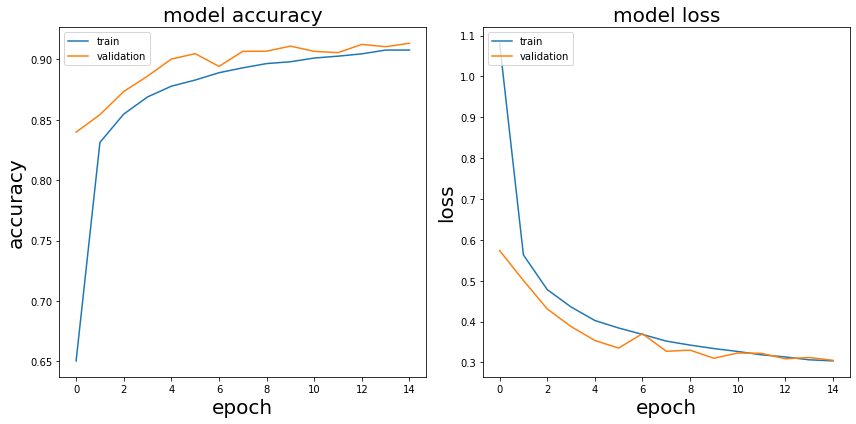

In [33]:
plot_everything(history_3)

In [34]:
#The summary
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 30, 30, 16)        448       
_________________________________________________________________
Conv2 (Conv2D)               (None, 28, 28, 16)        2320      
_________________________________________________________________
Maxpool1 (MaxPooling2D)      (None, 14, 14, 16)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 12, 12, 32)        4640      
_________________________________________________________________
Conv4 (Conv2D)               (None, 10, 10, 64)        18496     
_________________________________________________________________
Maxpool2 (MaxPooling2D)      (None, 5, 5, 64)          0         
_________________________________________________________________
Dropper (Dropout)            (None, 5, 5, 64)         